---

# Modèles de Machine Learning

---

##### Implémentation de différents modèles de machine learning appliqués à la prédiction de données sur les données de consommation électrique.

## Import des librairies nécessaires, initialisation et mise en forme du set de données.

##### On importe les différentes librairies Python nécessaires : Pandas / Numpy / Seaborn / XGBoost.

In [1]:
#importation des librairies nécéssaires
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

dataset = pd.read_csv('DAYTON_hourly.csv', index_col='Datetime')
dataset1 = pd.read_csv('OHDAYTON.csv', index_col='Datetime')
dataset.index = pd.to_datetime(dataset.index)
dataset1.index = pd.to_datetime(dataset1.index)

In [2]:
#info du dataset
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119019 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DAYTON_MW  119019 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


(119019, 1)

In [3]:
#info du dataset
dataset1.info()
dataset1.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4960 entries, 2005-01-01 to 2018-07-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Température  4960 non-null   float64
dtypes: float64(1)
memory usage: 77.5 KB


(4960, 1)

##### On met en forme de set de données sur lequel nous travaillons.

In [4]:
#comptage du nombre de données manquantes dans le dataset
dataset.isnull().sum()

DAYTON_MW    0
dtype: int64

In [5]:
#comptage du nombre de données manquantes dans le dataset
dataset1.isnull().sum()

Température    0
dtype: int64

In [6]:
#résumé statistique
dataset.describe()

,DAYTON_MW
count,119019.000000
mean,2038.759080
std,394.785248
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2281.000000
max,3746.000000


In [7]:
#résumé statistique
dataset1.describe()

,Température
count,4960.000000
mean,52.886815
std,18.948147
min,-6.600000
25%,37.600000
50%,55.200000
75%,69.700000
max,91.200000


In [8]:
dataset = dataset.sort_values(by="Datetime")

In [9]:
dataset1 = dataset1.sort_values(by="Datetime")

<AxesSubplot: title={'center': 'Energy use in MW'}, xlabel='Datetime'>

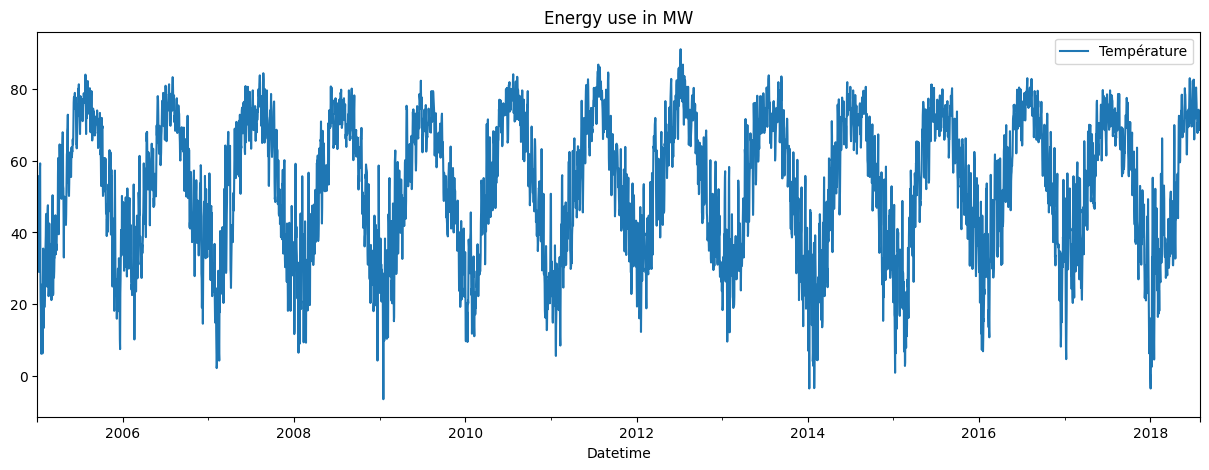

In [10]:
# plot des données 
dataset1.plot(figsize=(15,5),title='Energy use in MW')

<AxesSubplot: title={'center': 'Temperature'}, xlabel='Datetime'>

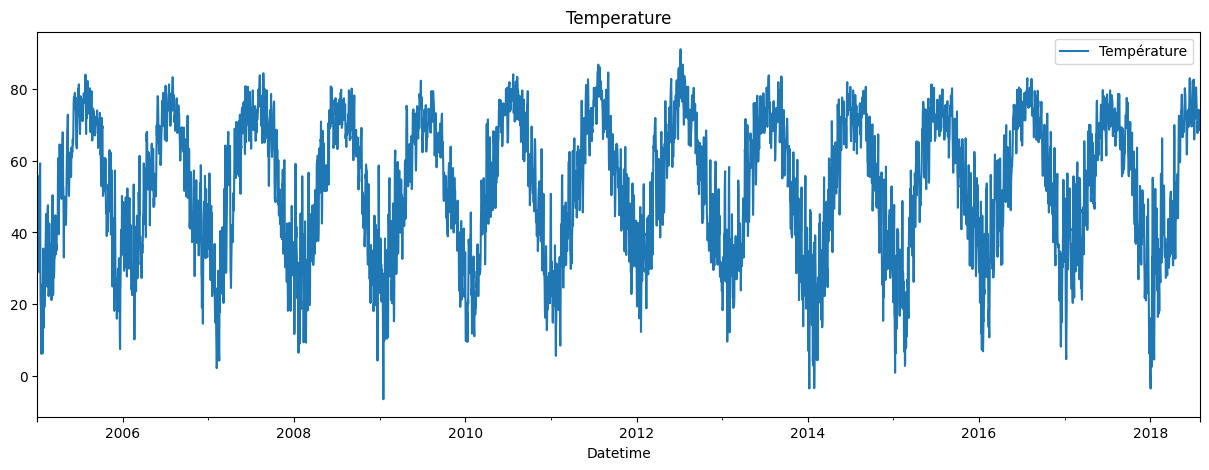

In [11]:
dataset1.plot(figsize=(15,5),title='Temperature')

In [12]:
daily_groups = dataset.resample('D')

In [13]:
dataset_daily = daily_groups.sum()

## Séparation du set de données.

<AxesSubplot: title={'center': 'Temperature in F°'}, xlabel='Datetime'>

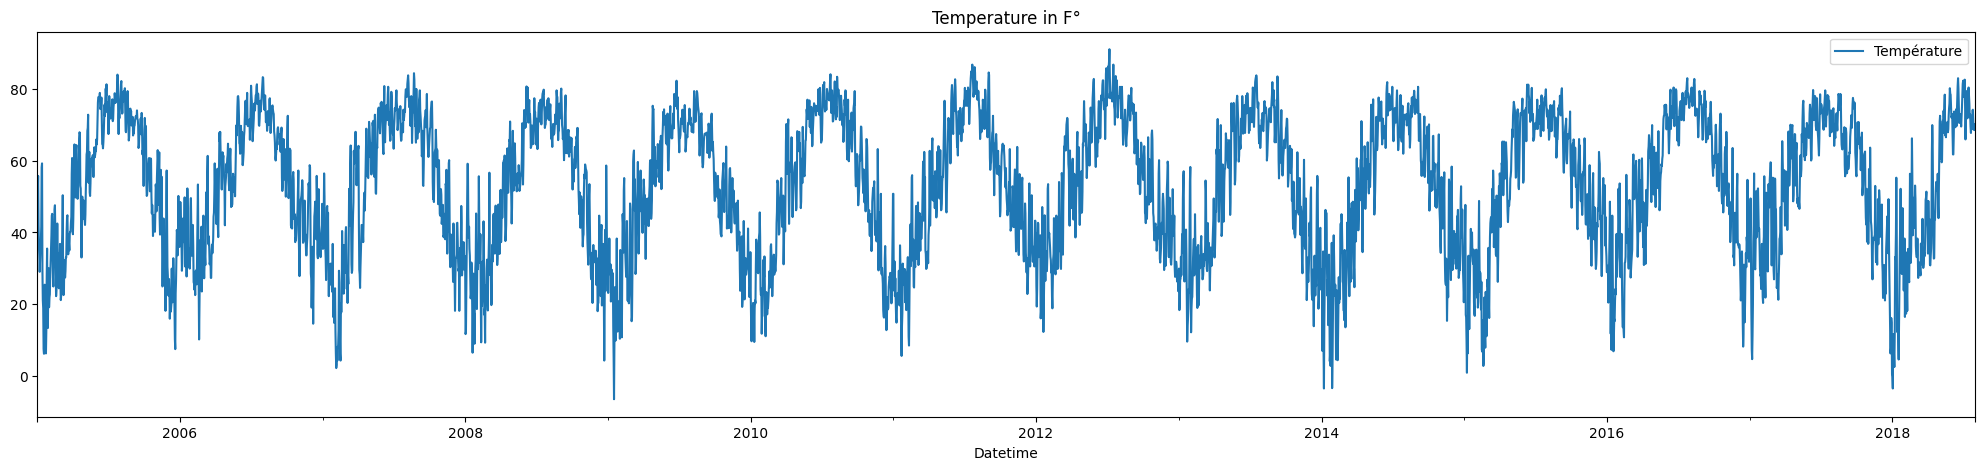

In [14]:
# plot des données 
dataset1.plot(figsize=(25,5),title='Temperature in F°')

<AxesSubplot: title={'center': 'Consumption in MW'}, xlabel='Datetime'>

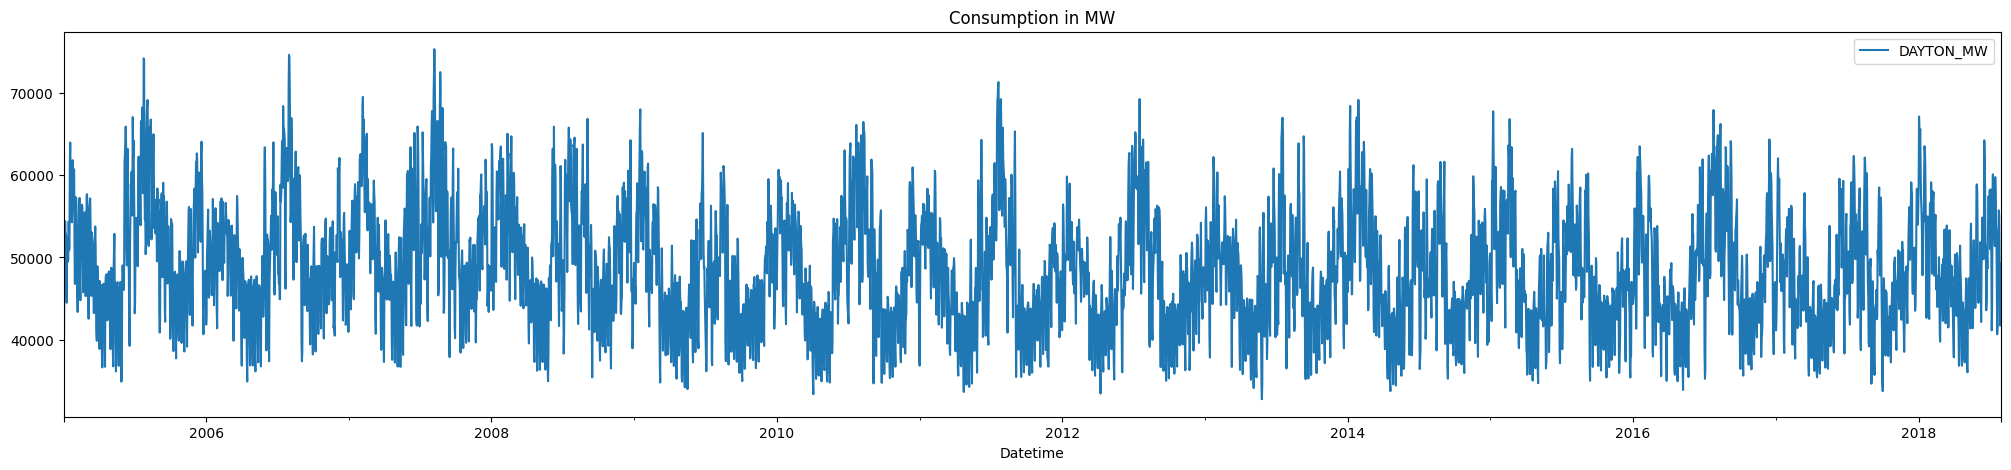

In [15]:
# plot des données 
dataset_daily.plot(figsize=(25,5),title='Consumption in MW')

In [16]:
dataset_final=dataset_daily.join(dataset1,on='Datetime')

array([<AxesSubplot: xlabel='Datetime'>, <AxesSubplot: xlabel='Datetime'>],
      dtype=object)

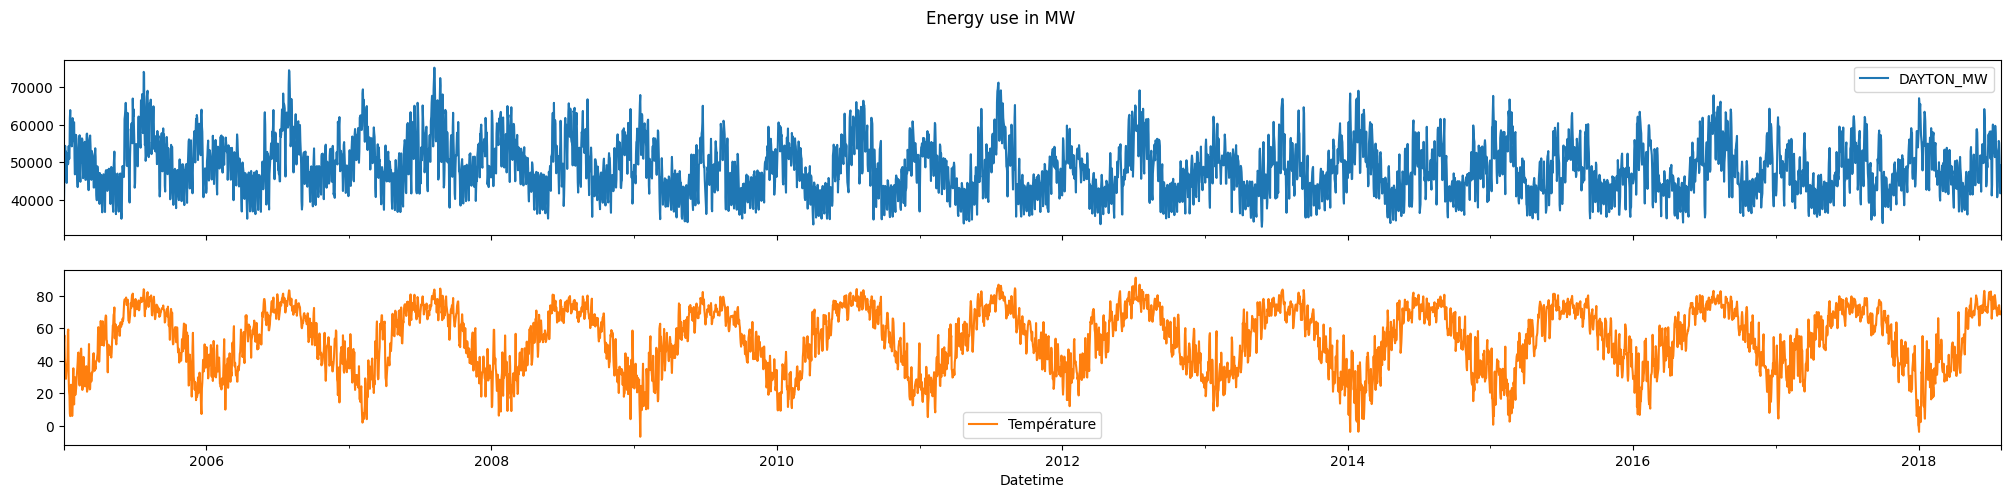

In [17]:
dataset_final.plot(figsize=(25,5),title='Energy use in MW',subplots='True')

##### Le set de données est séparé en 2 parties, l'une appelée "**Train**" contenant 80 % des données du set et l'autre appelée "**Test**".

In [18]:
#split train et test
nb_lines = dataset_final.shape[0]
train = dataset_final.iloc[:int(nb_lines*0.8)]
test = dataset_final.iloc[int(nb_lines*0.8)+1:]

array([<AxesSubplot: xlabel='Datetime'>, <AxesSubplot: xlabel='Datetime'>],
      dtype=object)

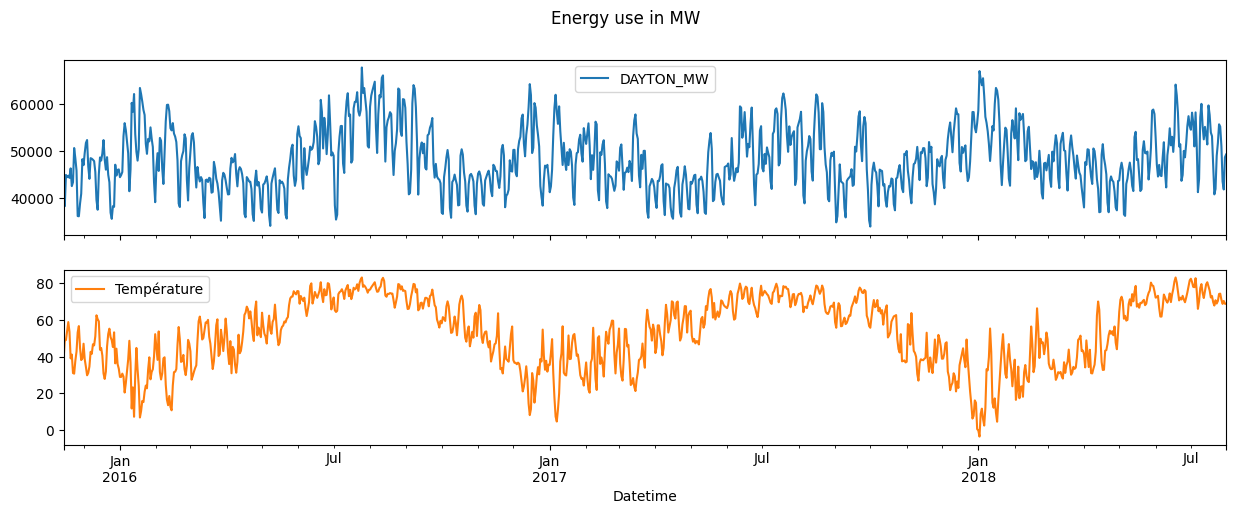

In [19]:
test.plot(figsize=(15,5),title='Energy use in MW',subplots='True')

array([<AxesSubplot: xlabel='Datetime'>, <AxesSubplot: xlabel='Datetime'>],
      dtype=object)

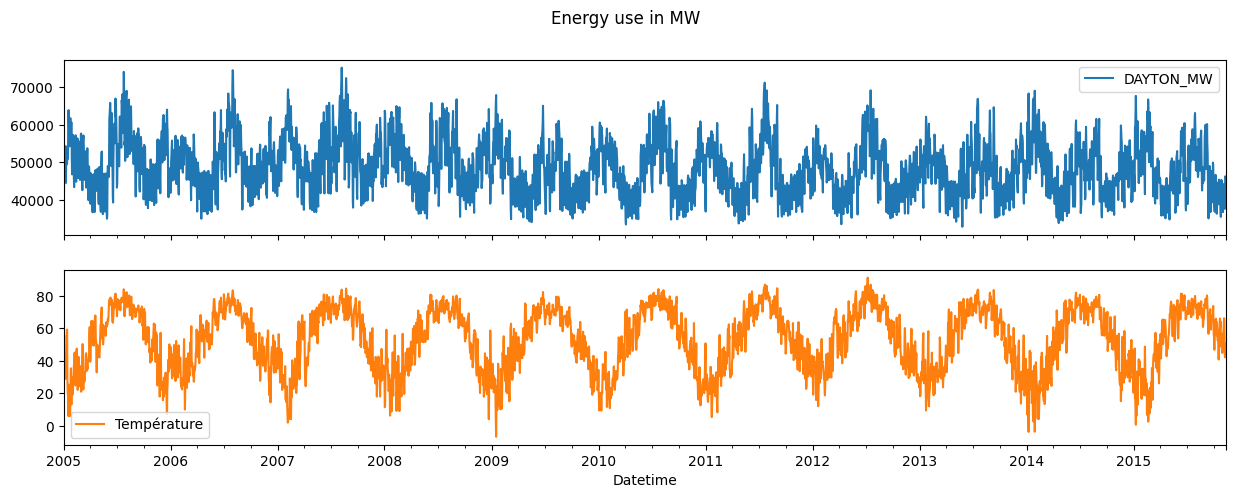

In [20]:
train.plot(figsize=(15,5),title='Energy use in MW',subplots='True')

##### Création d'une fonction qui explicite l'heure, le jour, la semaine, le mois et l'année pour chaque données présente dans notre set de données.

In [21]:
def creation_index_temps(ds):
    ds['Jour(Semaine)']=ds.index.dayofweek
    ds['Semaine']=ds.index.week
    ds['Mois']=ds.index.month
    ds['Année']=ds.index.year
    ds['Jour(Année)']=ds.index.day
    return ds

In [22]:
creation_index_temps(dataset_final)

C:\Users\tautu\AppData\Local\Temp\ipykernel_12908\2549928062.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ds['Semaine']=ds.index.week


,DAYTON_MW,Température,Jour(Semaine),Semaine,Mois,Année,Jour(Année)
Datetime,,,,,,,
2005-01-01,37036.0,48.1,5,53,1,2005,1
2005-01-02,39528.0,50.9,6,53,1,2005,2
2005-01-03,47581.0,55.8,0,1,1,2005,3
2005-01-04,50831.0,42.5,1,1,1,2005,4
2005-01-05,54399.0,36.3,2,1,1,2005,5
...,...,...,...,...,...,...,...
2018-07-27,51037.0,71.0,4,30,7,2018,27
2018-07-28,43442.0,68.7,5,30,7,2018,28
2018-07-29,41731.0,70.3,6,30,7,2018,29


In [23]:
train = creation_index_temps(train)
test = creation_index_temps(test)

C:\Users\tautu\AppData\Local\Temp\ipykernel_12908\2549928062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Jour(Semaine)']=ds.index.dayofweek
C:\Users\tautu\AppData\Local\Temp\ipykernel_12908\2549928062.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ds['Semaine']=ds.index.week
C:\Users\tautu\AppData\Local\Temp\ipykernel_12908\2549928062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

array([<AxesSubplot: xlabel='Datetime'>, <AxesSubplot: xlabel='Datetime'>,
       <AxesSubplot: xlabel='Datetime'>, <AxesSubplot: xlabel='Datetime'>,
       <AxesSubplot: xlabel='Datetime'>, <AxesSubplot: xlabel='Datetime'>,
       <AxesSubplot: xlabel='Datetime'>], dtype=object)

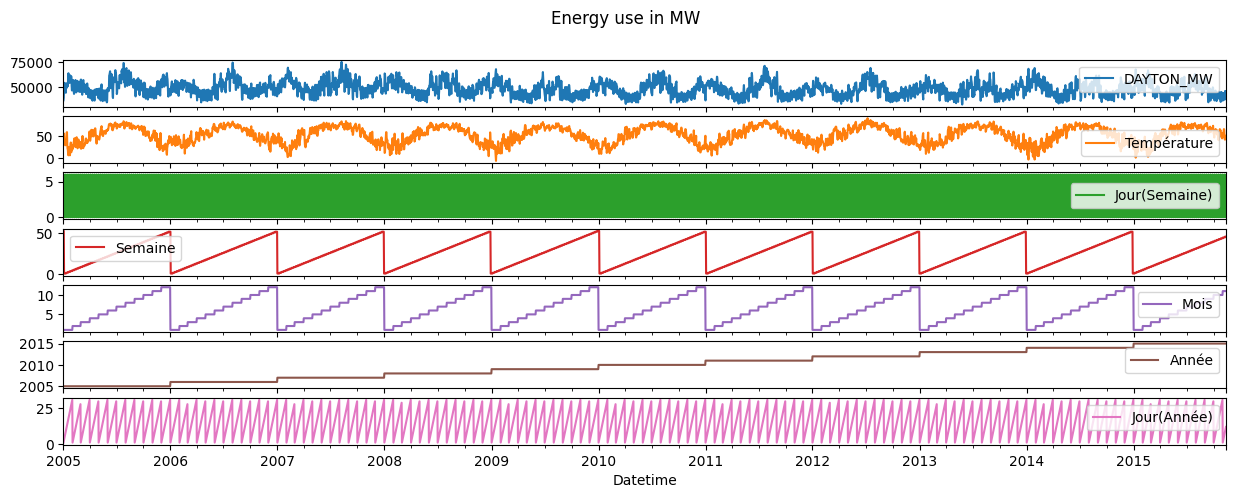

In [24]:
train.plot(figsize=(15,5),title='Energy use in MW',subplots='True')

## Entraînement sur le set de données "**Train**".

##### On liste toutes les entrées sur lesquelles nous allons appliquer l'algorithme d'entraînement, ainsi que la sortie souhaitée (la valeur que nous souhaitons prédire avec le modèle).

* SANS TEMPERATURE

In [25]:
ENTREES = ['Jour(Semaine)', 'Semaine', 'Mois', 'Année', 'Jour(Année)']
SORTIES = ['DAYTON_MW']

In [26]:
X_train = train[ENTREES]
Y_train = train[SORTIES]

X_test = test[ENTREES]
Y_test = test[SORTIES]

##### On entraîne le modèle de machine learning sur le set de données "**Train**" en utilisant la méthode de boosting de gradient extrême (XGBoost).

In [27]:
reg = xgb.XGBRegressor(
    n_estimators=200000,        # Hauteur maximale de l'arbre de décision créé lors du boosting
    early_stopping_rounds=200,  # Nombre maximal de sorties de la fonction
    learning_rate=0.0001)       # Ratio d'apprentissage
reg.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train),(X_test,Y_test)],
    verbose=1000)              # Pas d'affichage des sorties (ici toutes les 1000 itérations)

[0]	validation_0-rmse:49613.34756	validation_1-rmse:48651.80067


[1000]	validation_0-rmse:44953.38978	validation_1-rmse:44047.26826
[2000]	validation_0-rmse:40741.42409	validation_1-rmse:39897.99180
[3000]	validation_0-rmse:36932.55249	validation_1-rmse:36152.96877
[4000]	validation_0-rmse:33488.78816	validation_1-rmse:32778.58905
[5000]	validation_0-rmse:30376.47126	validation_1-rmse:29724.64621
[6000]	validation_0-rmse:27564.90203	validation_1-rmse:26970.11200
[7000]	validation_0-rmse:25025.33002	validation_1-rmse:24487.22949
[8000]	validation_0-rmse:22732.36518	validation_1-rmse:22247.33411
[9000]	validation_0-rmse:20663.26886	validation_1-rmse:20232.71625
[10000]	validation_0-rmse:18796.98303	validation_1-rmse:18420.93671
[11000]	validation_0-rmse:17114.46885	validation_1-rmse:16793.97378
[12000]	validation_0-rmse:15599.04543	validation_1-rmse:15337.44851
[13000]	validation_0-rmse:14234.91545	validation_1-rmse:14034.02714
[14000]	validation_0-rmse:13009.55132	validation_1-rmse:12861.20369
[15000]	validation_0-rmse:11909.27151	validation_1-rmse:1

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=200, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

    L'algorithme s'exécute de manière à faire diminuer l'erreur "root-mean-squared-error" ou "rmse" sur le set de données d'entraînement, ce qui la fait parrallèlement diminuer pour le set de test (les données que nous souhaitons prédire). L'algorithme entraîne le modèle jusqu'à ce que l'erreur calculée sur le set de test soit minimale, en effet celle-ci augmente quand le modèle apprend par coeur les données sur lesquelles il s'est entraîné (cela s'appelle l'overfitting et ce n'est pas souhaitable pour les prédictions sur des nouveaux sets de données).

<AxesSubplot: title={'center': 'Importance des facteurs utilisés dans le modèle'}>

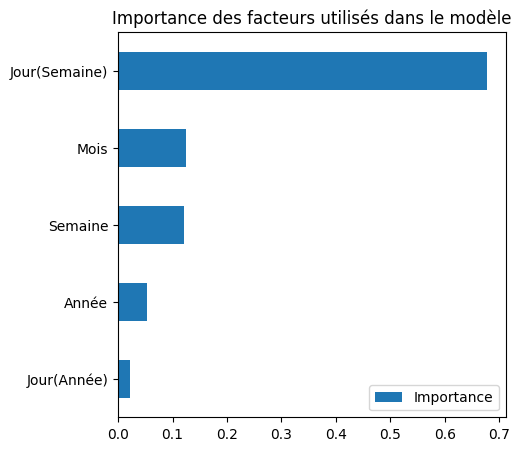

In [28]:
imp = pd.DataFrame(
    data=reg.feature_importances_,
    index=reg.feature_names_in_,
    columns=['Importance'])

imp.sort_values('Importance').plot(
    figsize=(5,5),
    kind='barh',
    title='Importance des facteurs utilisés dans le modèle')

* SANS TEMPERATURE

In [29]:
ENTREES_TEMP = ['Jour(Semaine)', 'Semaine', 'Mois', 'Année', 'Jour(Année)', 'Température']
SORTIES_TEMP = ['DAYTON_MW']

In [30]:
X_train_TEMP = train[ENTREES_TEMP]
Y_train_TEMP = train[SORTIES_TEMP]

X_test_TEMP = test[ENTREES_TEMP]
Y_test_TEMP = test[SORTIES_TEMP]

##### On entraîne le modèle de machine learning sur le set de données "**Train**" en utilisant la méthode de boosting de gradient extrême (XGBoost).

In [31]:
reg_TEMP = xgb.XGBRegressor(
    n_estimators=200000,        # Hauteur maximale de l'arbre de décision créé lors du boosting
    early_stopping_rounds=200,  # Nombre maximal de sorties de la fonction
    learning_rate=0.0001)       # Ratio d'apprentissage
reg_TEMP.fit(
    X_train_TEMP, Y_train_TEMP,
    eval_set=[(X_train_TEMP, Y_train_TEMP),(X_test_TEMP,Y_test_TEMP)],
    verbose=1000)              # Pas d'affichage des sorties (ici toutes les 1000 itérations)

[0]	validation_0-rmse:49613.32468	validation_1-rmse:48651.78319


[1000]	validation_0-rmse:44929.28977	validation_1-rmse:44014.56830
[2000]	validation_0-rmse:40691.33013	validation_1-rmse:39839.61243
[3000]	validation_0-rmse:36856.75346	validation_1-rmse:36093.42702
[4000]	validation_0-rmse:33386.92846	validation_1-rmse:32686.61389
[5000]	validation_0-rmse:30247.51032	validation_1-rmse:29605.80757
[6000]	validation_0-rmse:27407.24500	validation_1-rmse:26824.85592
[7000]	validation_0-rmse:24837.89766	validation_1-rmse:24319.18346
[8000]	validation_0-rmse:22513.49215	validation_1-rmse:22055.71959
[9000]	validation_0-rmse:20411.04270	validation_1-rmse:20013.96632
[10000]	validation_0-rmse:18509.30237	validation_1-rmse:18170.37186
[11000]	validation_0-rmse:16789.35400	validation_1-rmse:16504.28041
[12000]	validation_0-rmse:15233.85175	validation_1-rmse:14995.29403
[13000]	validation_0-rmse:13827.47567	validation_1-rmse:13633.03126
[14000]	validation_0-rmse:12555.91535	validation_1-rmse:12402.13427
[15000]	validation_0-rmse:11406.72240	validation_1-rmse:1

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=200, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

    L'algorithme s'exécute de manière à faire diminuer l'erreur "root-mean-squared-error" ou "rmse" sur le set de données d'entraînement, ce qui la fait parrallèlement diminuer pour le set de test (les données que nous souhaitons prédire). L'algorithme entraîne le modèle jusqu'à ce que l'erreur calculée sur le set de test soit minimale, en effet celle-ci augmente quand le modèle apprend par coeur les données sur lesquelles il s'est entraîné (cela s'appelle l'overfitting et ce n'est pas souhaitable pour les prédictions sur des nouveaux sets de données).

<AxesSubplot: title={'center': 'Importance des facteurs utilisés dans le modèle'}>

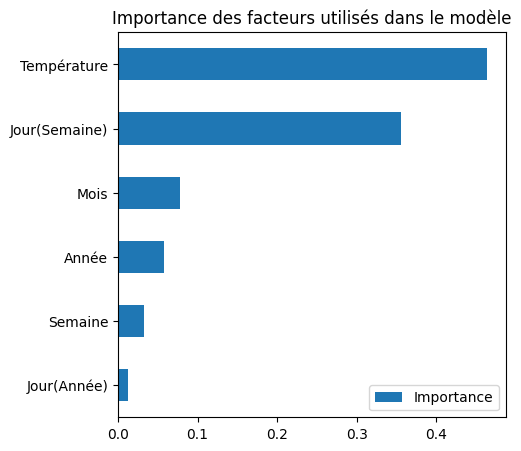

In [32]:
imp_TEMP = pd.DataFrame(
    data=reg_TEMP.feature_importances_,
    index=reg_TEMP.feature_names_in_,
    columns=['Importance'])

imp_TEMP.sort_values('Importance').plot(
    figsize=(5,5),
    kind='barh',
    title='Importance des facteurs utilisés dans le modèle')

##### On trace les données présentes dans le set de données "**Test**" ainsi que les prédictions estimées par le modèle.

In [33]:
test['prediction'] = reg.predict(X_test)
dataset_final = dataset_final.merge(test[['prediction']], how='left', left_index=True, right_index=True)

C:\Users\tautu\AppData\Local\Temp\ipykernel_12908\2034891001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


Text(0.5, 1.0, 'Prédictions et données brutes')

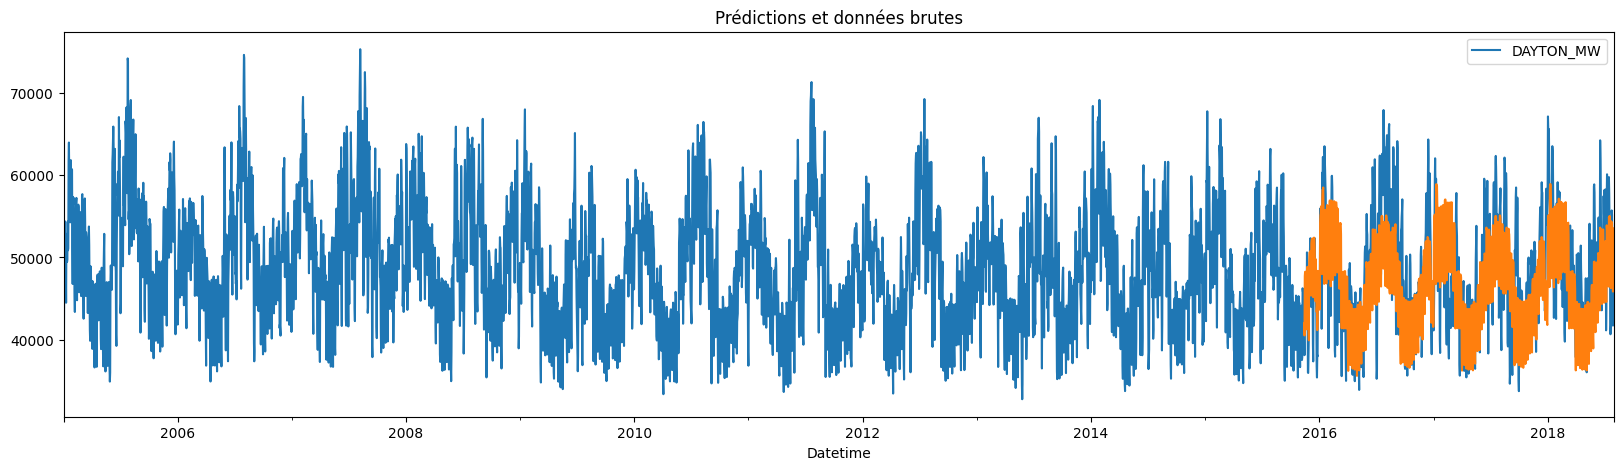

In [34]:
ax = dataset_final[['DAYTON_MW']].plot(figsize=(20,5))
dataset_final['prediction'].plot(ax=ax)
ax.set_title('Prédictions et données brutes')

    Intégralité des données prédites.

In [35]:
test_predic = dataset_final.iloc[int(nb_lines*0.8)+1:]

<AxesSubplot: xlabel='Datetime'>

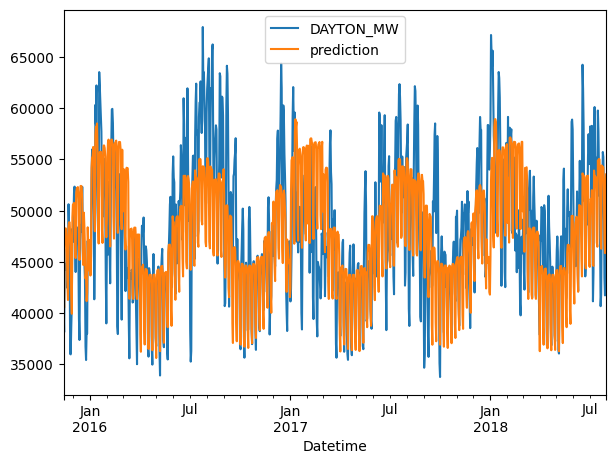

In [36]:
test_predic.plot(y=['DAYTON_MW','prediction'],figsize=(7,5))

    Centaine de données prédites.

In [37]:
test_predic = dataset_final.iloc[int(nb_lines*0.8)+1:int(nb_lines*0.8)+101]

<AxesSubplot: xlabel='Datetime'>

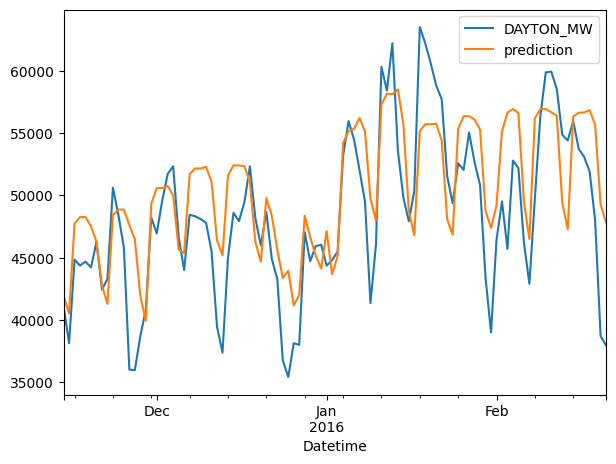

In [38]:
test_predic.plot(y=['DAYTON_MW','prediction'],figsize=(7,5))

##### On trace les données présentes dans le set de données "**Test**" ainsi que les prédictions estimées par le modèle.

In [39]:
test['prediction avec temperature'] = reg_TEMP.predict(X_test_TEMP)
dataset_final = dataset_final.merge(test[['prediction avec temperature']], how='left', left_index=True, right_index=True)

C:\Users\tautu\AppData\Local\Temp\ipykernel_12908\631696765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction avec temperature'] = reg_TEMP.predict(X_test_TEMP)


Text(0.5, 1.0, 'Prédictions et données brutes')

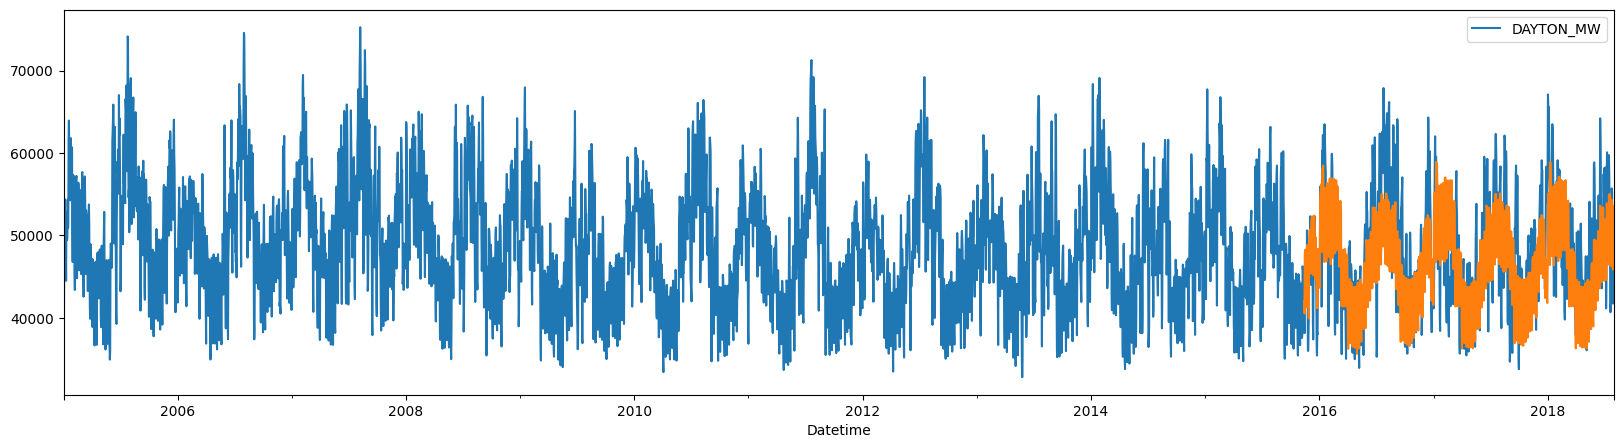

In [40]:
ax_temp = dataset_final[['DAYTON_MW']].plot(figsize=(20,5))
dataset_final['prediction'].plot(ax=ax_temp)
ax.set_title('Prédictions et données brutes')

    Intégralité des données prédites.

In [41]:
test_predic_temp = dataset_final.iloc[int(nb_lines*0.8)+1:]

<AxesSubplot: xlabel='Datetime'>

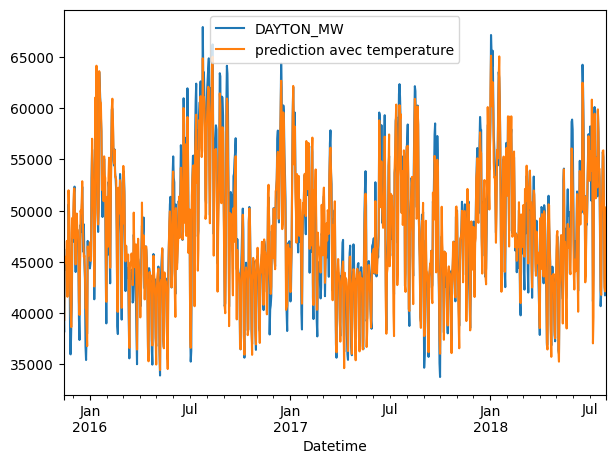

In [42]:
test_predic_temp.plot(y=['DAYTON_MW','prediction avec temperature'],figsize=(7,5))

    Centaine de données prédites.

In [43]:
test_predic_temp = dataset_final.iloc[int(nb_lines*0.8)+1:int(nb_lines*0.8)+101]

<AxesSubplot: xlabel='Datetime'>

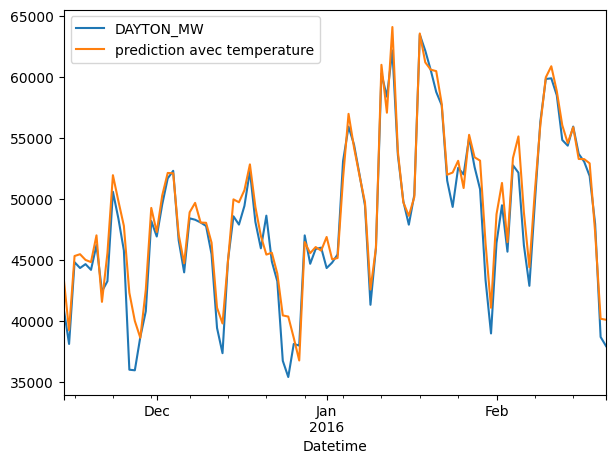

In [48]:
test_predic_temp.plot(y=['DAYTON_MW','prediction avec temperature'],figsize=(7,5))

##### Calcul de l'erreur (root_mean_squared_error) entre les prédictions et les données réelles brutes du set "**Test**".

In [ ]:
score = mean_squared_error(test['DAYTON_MW'], test['prediction'], squared=False)
print('RMSE =', score)

RMSE = 5040.5360585249755


In [ ]:
score_TEMP = mean_squared_error(test['DAYTON_MW'], test['prediction avec temperature'], squared=False)
print('RMSE =', score_TEMP)

RMSE = 1695.0614233162114
